In [1]:
%store -r import_all_libs

In [2]:
import_all_libs

In [48]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

In [60]:
def plot_cloud(wordcloud, figsize):
    # Set figure size
    plt.figure(figsize=figsize)
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [3]:
df = pd.read_csv('/home/tuts/datasets/wine/winemag-data-130k-v2.csv', index_col=0)

In [4]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,nan,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.00,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.00,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.00,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.00,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
df.drop(['taster_name', 'taster_twitter_handle'], inplace=True, axis=1)

In [6]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,nan,Sicily & Sardinia,Etna,NaN,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.00,Douro,NaN,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.00,Oregon,Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.00,Michigan,Lake Michigan Shore,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.00,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [7]:
country = df.country.value_counts()[::-1]

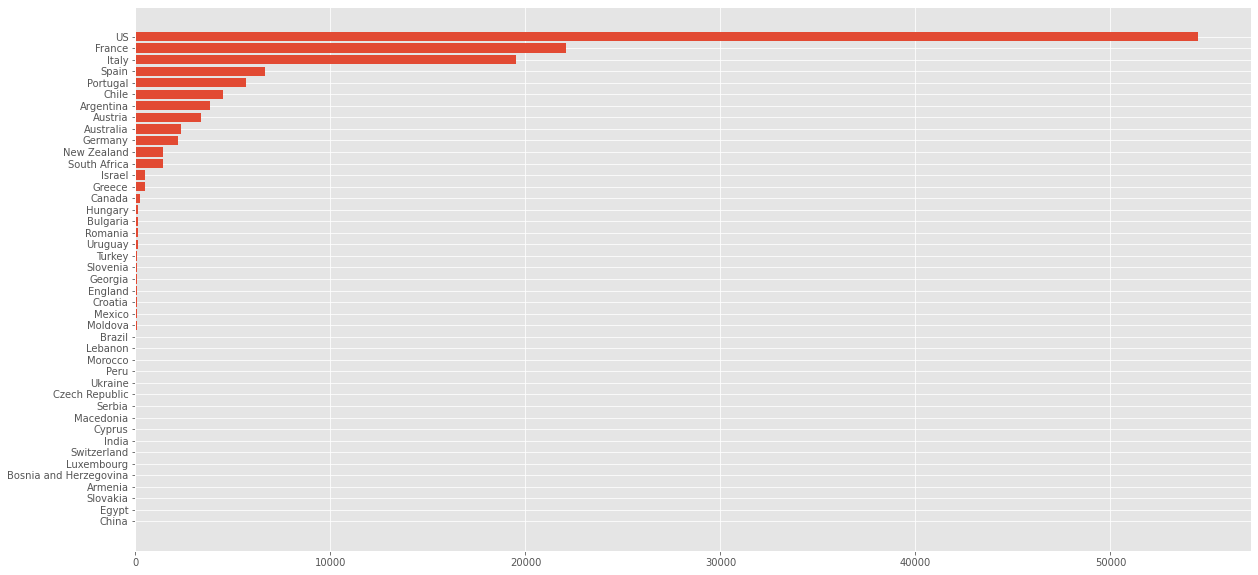

In [8]:
plt.figure(figsize=(20,10))
plt.barh(country.index, country.values);

In [9]:
country_percent = country/country.sum()
country_percent = country_percent.append(pd.Series([country_percent[country_percent < 0.01].sum()], index=['Others']))
country_percent

China                    0.00
Egypt                    0.00
Slovakia                 0.00
Armenia                  0.00
Bosnia and Herzegovina   0.00
Luxembourg               0.00
Switzerland              0.00
India                    0.00
Cyprus                   0.00
Macedonia                0.00
Serbia                   0.00
Czech Republic           0.00
Ukraine                  0.00
Peru                     0.00
Morocco                  0.00
Lebanon                  0.00
Brazil                   0.00
Moldova                  0.00
Mexico                   0.00
Croatia                  0.00
England                  0.00
Georgia                  0.00
Slovenia                 0.00
Turkey                   0.00
Uruguay                  0.00
Romania                  0.00
Bulgaria                 0.00
Hungary                  0.00
Canada                   0.00
Greece                   0.00
Israel                   0.00
South Africa             0.01
New Zealand              0.01
Germany   

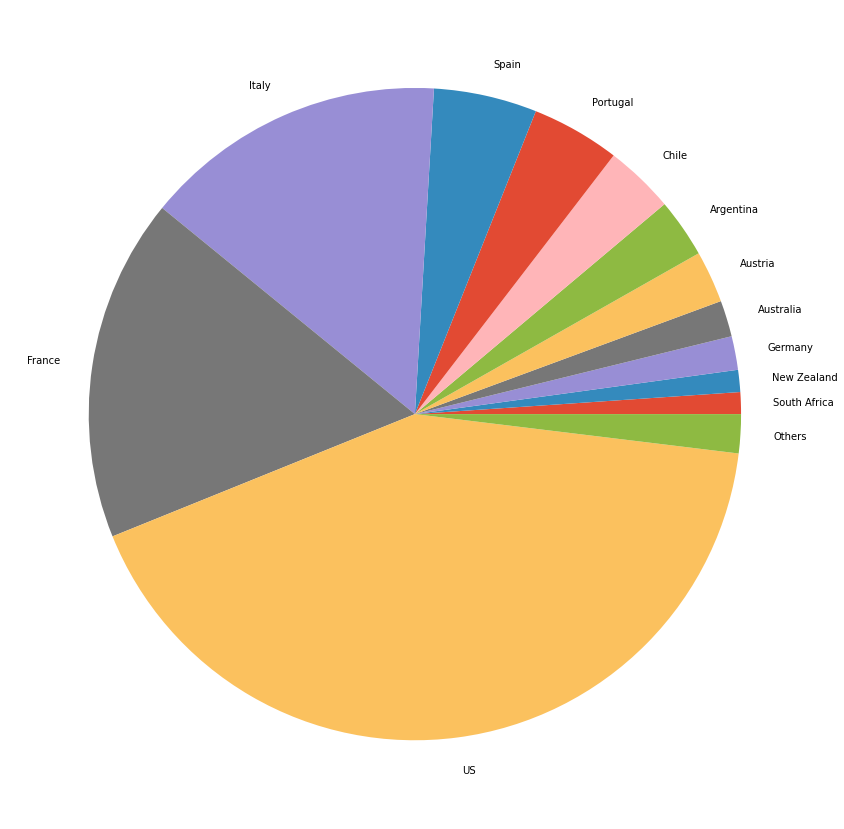

In [10]:
plt.figure(figsize=(15,15))
plt.pie(country_percent[country_percent > 0.01], labels=country_percent[country_percent > 0.01].index);

In [11]:
df.price.describe()

count   120975.00
mean        35.36
std         41.02
min          4.00
25%         17.00
50%         25.00
75%         42.00
max       3300.00
Name: price, dtype: float64

In [12]:
df.iloc[df.price.argmin()]

country                                                    Spain
description    Berry and cherry aromas are surprisingly sturd...
designation                                          Flirty Bird
points                                                        85
price                                                       4.00
province                                           Central Spain
region_1                           Vino de la Tierra de Castilla
region_2                                                     NaN
title          Felix Solis 2013 Flirty Bird Syrah (Vino de la...
variety                                                    Syrah
winery                                               Felix Solis
Name: 1987, dtype: object

In [13]:
df.iloc[df.price.argmax()]

country                                                   France
description    This ripe wine shows plenty of blackberry frui...
designation                                                  NaN
points                                                        88
price                                                    3300.00
province                                                Bordeaux
region_1                                                   Médoc
region_2                                                     NaN
title                       Château les Ormes Sorbet 2013  Médoc
variety                                 Bordeaux-style Red Blend
winery                                  Château les Ormes Sorbet
Name: 80290, dtype: object

In [14]:
df[['country', 'price']].groupby('country', as_index=False).median().sort_values(by='price').iloc[-10:]

,country,price
3,Austria,25.00
23,Lebanon,25.00
21,Israel,25.00
17,Germany,26.00
22,Italy,28.00
7,Canada,30.00
40,US,30.00
38,Switzerland,38.00
14,England,50.00
13,Egypt,nan


In [15]:
df[['country', 'price']].groupby('country', as_index=False).median().sort_values(by='price').iloc[:10]

,country,price
41,Ukraine,9.00
32,Romania,9.00
20,India,12.00
4,Bosnia and Herzegovina,12.50
6,Bulgaria,13.00
27,Moldova,13.00
1,Armenia,14.50
30,Peru,14.50
25,Macedonia,15.00
8,Chile,15.00


In [18]:
df.variety.value_counts().iloc[:10]

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
Riesling                     5189
Sauvignon Blanc              4967
Syrah                        4142
Rosé                         3564
Merlot                       3102
Name: variety, dtype: int64

In [22]:
df.variety.value_counts(normalize=True).iloc[:10]

Pinot Noir                 0.10
Chardonnay                 0.09
Cabernet Sauvignon         0.07
Red Blend                  0.07
Bordeaux-style Red Blend   0.05
Riesling                   0.04
Sauvignon Blanc            0.04
Syrah                      0.03
Rosé                       0.03
Merlot                     0.02
Name: variety, dtype: float64

In [24]:
df.winery.value_counts(normalize=True)

Wines & Winemakers    0.00
Testarossa            0.00
DFJ Vinhos            0.00
Williams Selyem       0.00
Louis Latour          0.00
                      ... 
Poggio alle Sughere   0.00
Roberto Cipresso      0.00
Baroncini             0.00
Château les Roques    0.00
Alain Graillot        0.00
Name: winery, Length: 16757, dtype: float64

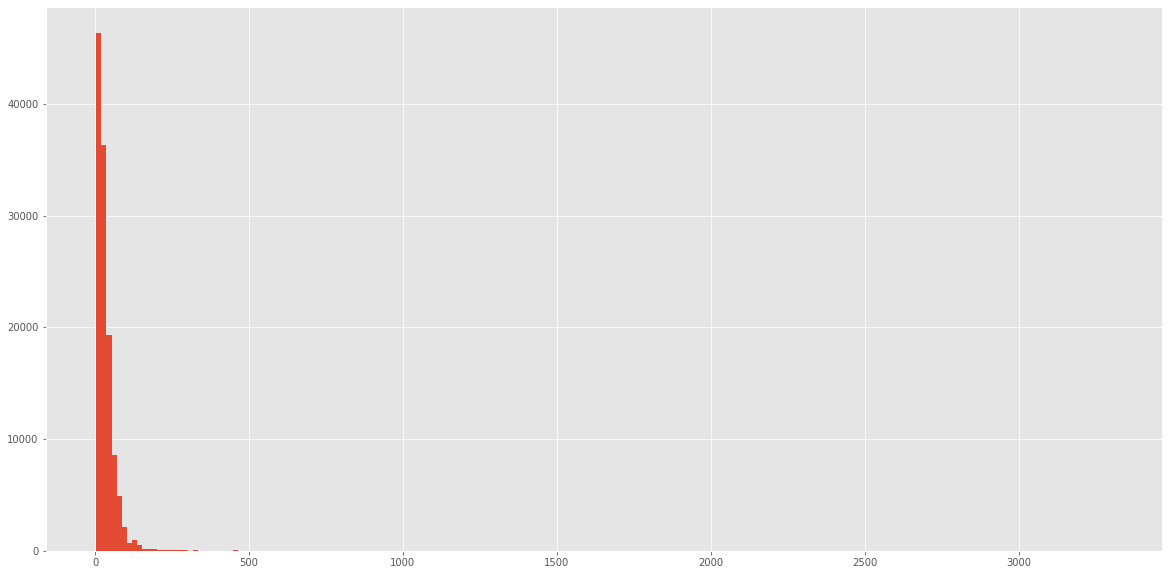

In [28]:
plt.figure(figsize=(20,10))
plt.hist(df.price, bins=200);

In [35]:
country_province_price = df[['country', 'province', 'price']].groupby(['country', 'province'], as_index=False).mean()

In [44]:
countries = df.country.unique()
for c in countries:
    cc = country_province_price[country_province_price.country == c]
    if len(cc):
        ccc = cc.iloc[cc.price.argmax()]
        print(f'Country: {ccc[0]} -  Region: {ccc[1]}\n')

Country: Italy -  Region: Piedmont

Country: Portugal -  Region: Colares

Country: US -  Region: California

Country: Spain -  Region: Andalucia

Country: France -  Region: Champagne

Country: Germany -  Region: Rheingau

Country: Argentina -  Region: Mendoza Province

Country: Chile -  Region: Puente Alto

Country: Australia -  Region: Victoria

Country: Austria -  Region: Südburgenland

Country: South Africa -  Region: Olifants River

Country: New Zealand -  Region: Waitaki Valley

Country: Israel -  Region: Haut-Judeé

Country: Hungary -  Region: Tokaji

Country: Greece -  Region: Epanomi

Country: Romania -  Region: Vânju Mare

Country: Mexico -  Region: San Antonio de las Minas Valley

Country: Canada -  Region: Ontario

Country: Turkey -  Region: Aegean

Country: Czech Republic -  Region: Moravia

Country: Slovenia -  Region: Vipavska Dolina

Country: Luxembourg -  Region: Moselle Luxembourgeoise

Country: Croatia -  Region: Middle and South Dalmatia

Country: Georgia -  Region: 

In [50]:
st = stopwords.words('portuguese')
st = set(st)

In [51]:
STOPWORDS.update(st)

In [53]:
text = ' '.join(df.description.astype('str'))

In [66]:
wordcloud = WordCloud(width = 2000, height = 2000, random_state=1, background_color='black', colormap='BuPu', collocations=False, stopwords = STOPWORDS).generate(text)

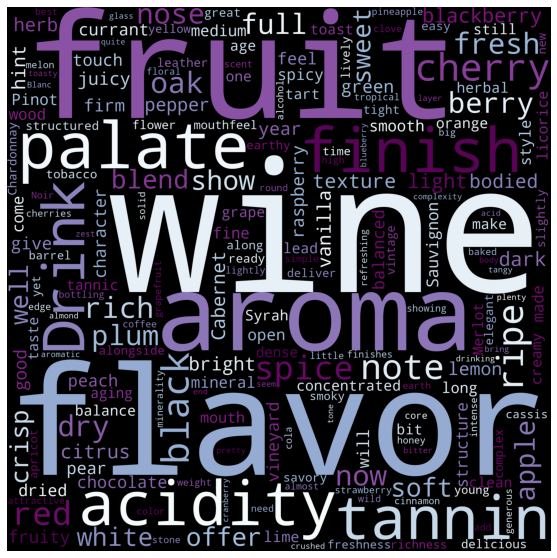

In [67]:
plot_cloud(wordcloud, (20,10))

## US wines

In [108]:
us = df[df.country == 'US']

In [110]:
us.head()

,country,description,designation,points,price,province,region_1,region_2,title,variety,winery
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.00,Oregon,Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.00,Michigan,Lake Michigan Shore,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.00,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.00,California,Napa Valley,Napa,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
12,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.00,California,Alexander Valley,Sonoma,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini


In [109]:
us.province.value_counts()

California           36247
Washington            8639
Oregon                5373
New York              2688
Virginia               777
Idaho                  192
Michigan               114
America                 95
Texas                   94
Colorado                68
New Mexico              45
Arizona                 41
Missouri                33
North Carolina          23
Pennsylvania            18
Ohio                    12
New Jersey               8
Washington-Oregon        7
Massachusetts            7
Illinois                 6
Iowa                     4
Nevada                   4
Vermont                  3
Connecticut              3
Kentucky                 1
Rhode Island             1
Hawaii                   1
Name: province, dtype: int64

In [111]:
us.region_1.value_counts()

Napa Valley                       4480
Columbia Valley (WA)              4124
Russian River Valley              3091
California                        2629
Paso Robles                       2350
                                  ... 
Niagara Escarpment                   1
Sonoma-Santa Barbara-Mendocino       1
Paso Robles Highlands District       1
Ohio                                 1
Napa-Sonoma-Marin                    1
Name: region_1, Length: 264, dtype: int64

In [112]:
us.price.describe()

count   54265.00
mean       36.57
std        27.09
min         4.00
25%        20.00
50%        30.00
75%        45.00
max      2013.00
Name: price, dtype: float64

## Brazilian wines

In [68]:
brazil = df[df.country == 'Brazil']

In [95]:
brazil.head()

,country,description,designation,points,price,province,region_1,region_2,title,variety,winery
5852,Brazil,"Pear, apple and wet-stone aromas are tight, wh...",Brut,88,36.00,Pinto Bandeira,NaN,NaN,Cave Geisse 2014 Brut Sparkling (Pinto Bandeira),Sparkling Blend,Cave Geisse
9151,Brazil,This opens with dusty dried-apple aromas. High...,Brut,83,31.00,Santa Catarina,NaN,NaN,Villaggio Grando 2011 Brut Sparkling (Santa Ca...,Sparkling Blend,Villaggio Grando
10565,Brazil,"The name is appropriate: this is intense, just...",Intenso,84,nan,Campanha,NaN,NaN,Salton 2013 Intenso Tannat (Campanha),Tannat,Salton
10579,Brazil,Roasted gritty aromas of asphalt and grilled b...,Intenso,84,nan,Campanha,NaN,NaN,Salton 2013 Intenso Cabernet Franc (Campanha),Cabernet Franc,Salton
12669,Brazil,This Cabernet Sauvignon-Merlot blend almost ha...,Reserva,83,20.00,Serra Gaúcha,NaN,NaN,Château Lacave 2002 Reserva Cabernet Sauvignon...,Cabernet Sauvignon-Merlot,Château Lacave


In [73]:
brazil.isna().sum()

country         0
description     0
designation     1
points          0
price           5
province        0
region_1       52
region_2       52
title           0
variety         0
winery          0
dtype: int64

In [97]:
brazil.shape

(52, 11)

In [98]:
brazil.price.mean()

23.76595744680851

In [99]:
brazil.price.describe()

count   47.00
mean    23.77
std     11.05
min     10.00
25%     15.00
50%     20.00
75%     29.00
max     60.00
Name: price, dtype: float64

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


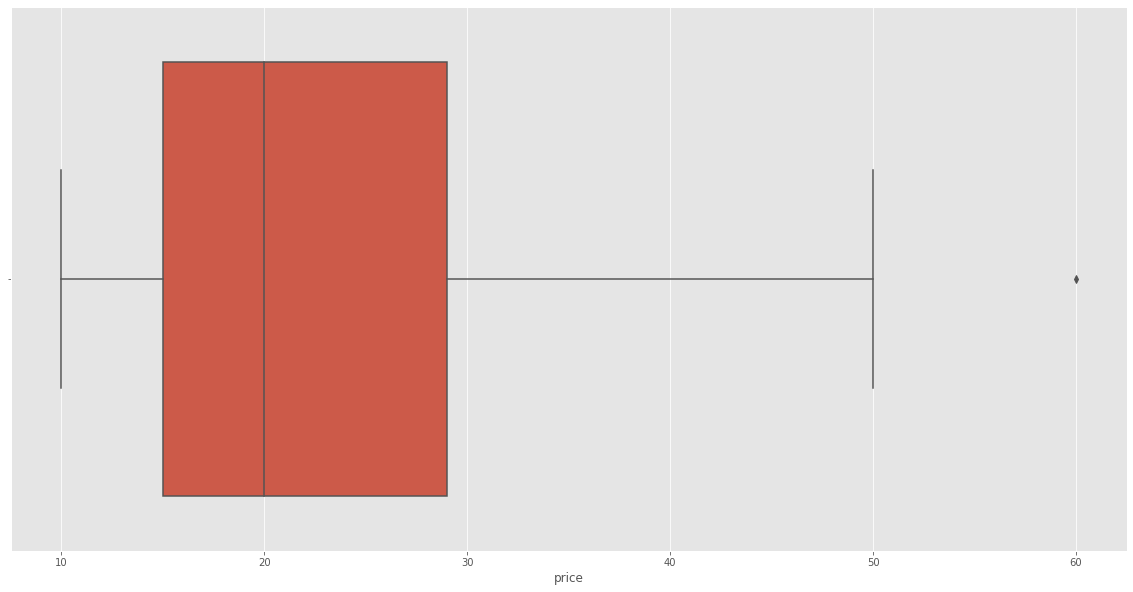

In [101]:
plt.figure(figsize=(20,10))
sns.boxplot(brazil.price);

In [87]:
brazil.winery.value_counts()

Casa Perini         12
Lidio Carraro        9
Salton               8
Cave Geisse          6
Casa Valduga         6
Miolo                4
Villaggio Grando     2
Vinícola Aurora      2
Pizzato              1
Château Lacave       1
Aurora Cellars       1
Name: winery, dtype: int64

In [75]:
variety_v_c = brazil.variety.value_counts()

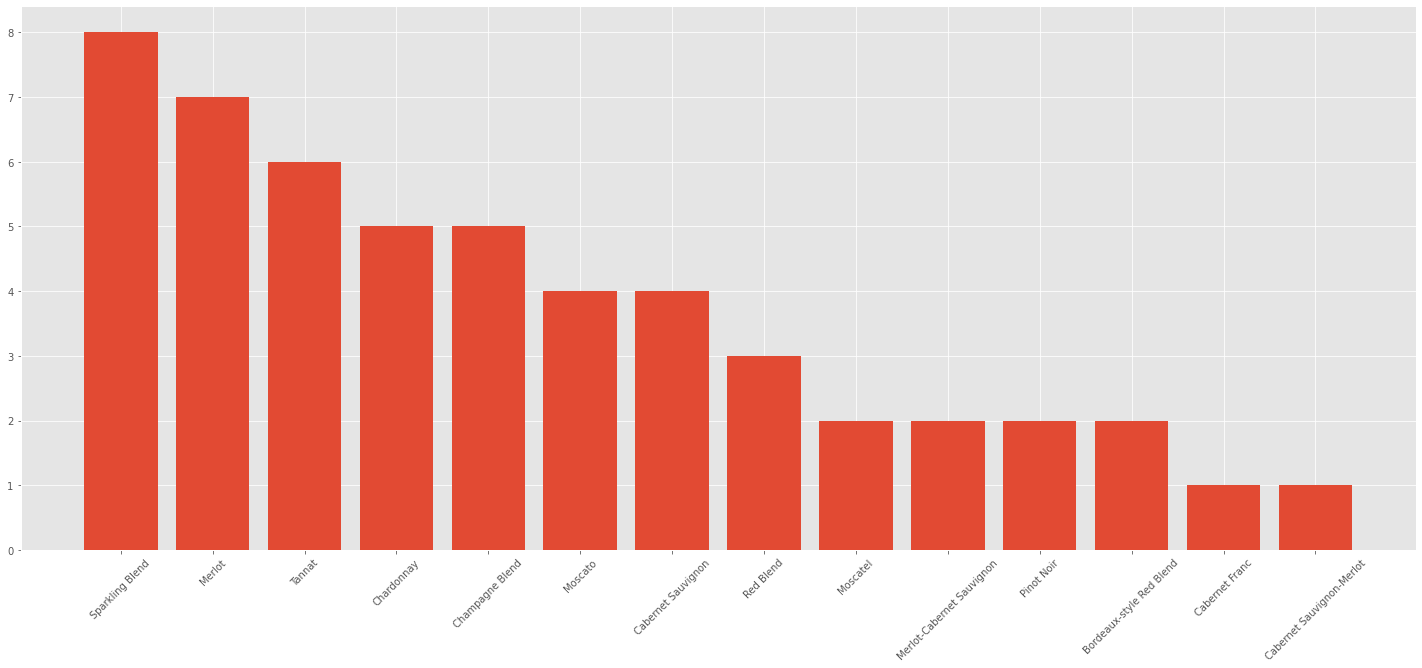

In [86]:
plt.figure(figsize=(25,10))
plt.bar(x=variety_v_c.index, height=variety_v_c.values)
plt.xticks(rotation=45);

In [69]:
text = ' '.join(brazil.description.astype('str'))

In [71]:
wordcloud = WordCloud(width = 2000, height = 2000, random_state=1, background_color='black', colormap='BuPu', collocations=False, stopwords = STOPWORDS).generate(text)

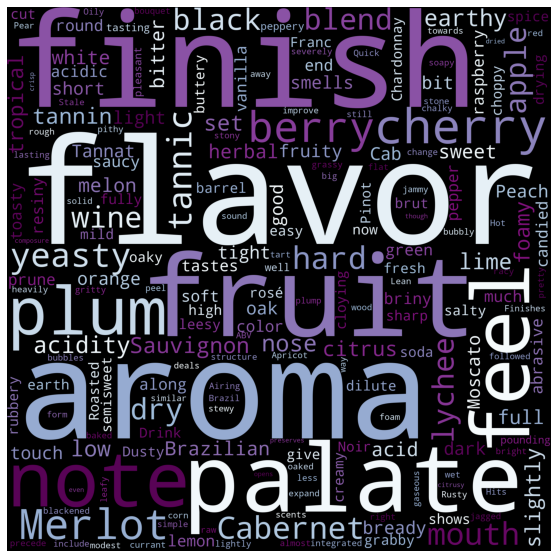

In [72]:
plot_cloud(wordcloud, (20,10))

## French wines

In [69]:
france = df[df['country'] == 'France']

In [70]:
france.head()

,country,description,designation,points,price,province,region_1,region_2,title,variety,winery
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.00,Alsace,Alsace,NaN,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.00,Alsace,Alsace,NaN,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
11,France,"This is a dry wine, very spicy, with a tight, ...",NaN,87,30.00,Alsace,Alsace,NaN,Leon Beyer 2012 Gewurztraminer (Alsace),Gewürztraminer,Leon Beyer
30,France,Red cherry fruit comes laced with light tannin...,Nouveau,86,nan,Beaujolais,Beaujolais-Villages,NaN,Domaine de la Madone 2012 Nouveau (Beaujolais...,Gamay,Domaine de la Madone
42,France,"This is a festive wine, with soft, ripe fruit ...",Nouveau,86,9.00,Beaujolais,Beaujolais,NaN,Henry Fessy 2012 Nouveau (Beaujolais),Gamay,Henry Fessy


In [71]:
france.points.mean()

88.84510931064138

In [72]:
france.province.value_counts()

Bordeaux                5941
Burgundy                3980
Alsace                  2440
Loire Valley            1856
Champagne               1613
Southwest France        1503
Provence                1346
Rhône Valley            1081
Beaujolais              1044
France Other             676
Languedoc-Roussillon     613
Name: province, dtype: int64

In [73]:
france.variety.value_counts()

Bordeaux-style Red Blend    4725
Chardonnay                  2808
Pinot Noir                  1966
Rosé                        1923
Champagne Blend             1243
                            ... 
Roussanne-Marsanne             1
Petit Verdot                   1
Petit Meslier                  1
Folle Blanche                  1
Clairette                      1
Name: variety, Length: 148, dtype: int64

In [74]:
france.price.mean()

41.139120162016205

In [75]:
france.price.describe()

count   17776.00
mean       41.14
std        73.77
min         5.00
25%        16.00
50%        25.00
75%        43.00
max      3300.00
Name: price, dtype: float64

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


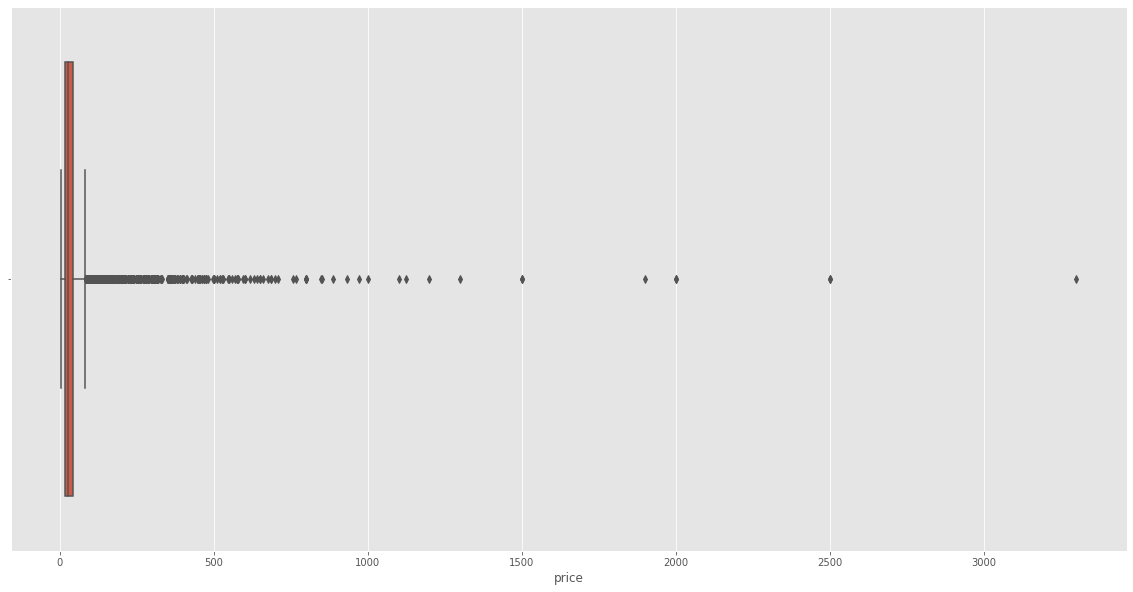

In [77]:
plt.figure(figsize=(20,10))
sns.boxplot(france.price);

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


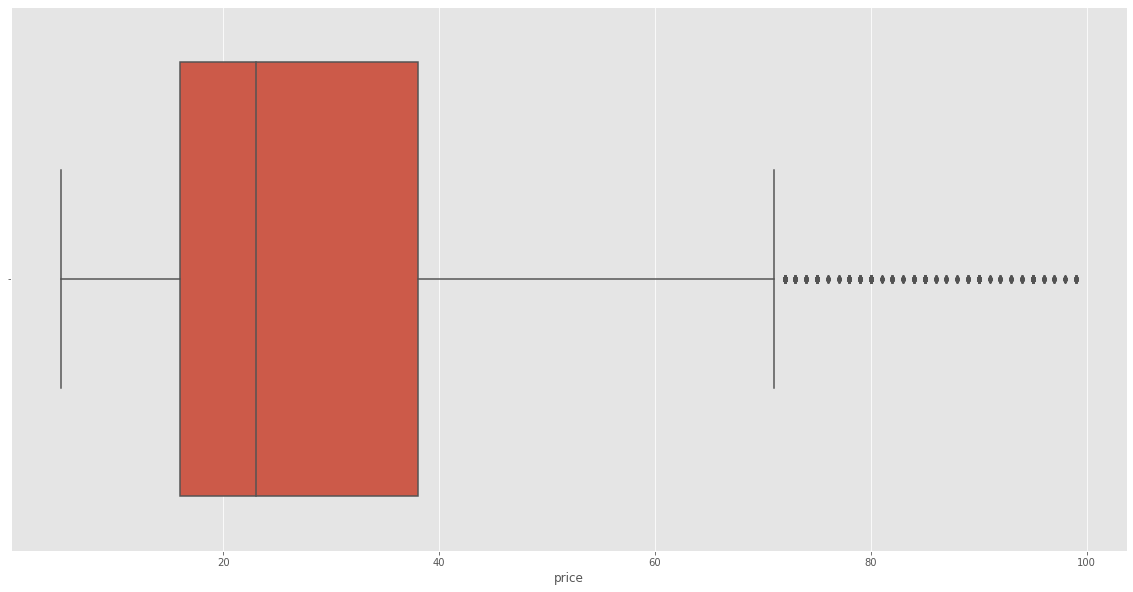

In [79]:
plt.figure(figsize=(20,10))
sns.boxplot(france.price[france.price < 100]);

In [81]:
france.iloc[france.price.argmax()]

country                                                   France
description    This ripe wine shows plenty of blackberry frui...
designation                                                  NaN
points                                                        88
price                                                    3300.00
province                                                Bordeaux
region_1                                                   Médoc
region_2                                                     NaN
title                       Château les Ormes Sorbet 2013  Médoc
variety                                 Bordeaux-style Red Blend
winery                                  Château les Ormes Sorbet
Name: 80290, dtype: object